# Simulation of power for linear regression

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import t
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
def sim_t_power(n,b,a,sd,nrep):
    pvals=np.empty(nrep)
    for r in np.arange(nrep):
        x=np.random.uniform(low=0,high=10,size = n)
        y=a+(b*x)+np.random.normal(0,sd,size = n)
        x2 = sm.add_constant(x)
        model = sm.OLS(y,x2)
        reg = model.fit()
        pvals[r] = reg.pvalues[1]
    return sum(pvals<.5)/nrep

In [3]:
#Test the function
print(sim_t_power(5,1,1,2,100))

0.94


In [4]:
def LinRegPower(n,b,a,sd,nrep):
    if (len(a) != len(b)):
        raise ValueError('Error: the length of the vectors are unequal')
    if (len(n) <= 1):
        raise ValueError('Error: n needs to be larger than 1')
    pow1 = np.empty([len(n),len(a)])
    labels = [None]*len(a)
    for i in np.arange(len(n)):
        for num in np.arange(len(a)):
            pow1[i,num] = sim_t_power(n[i],b[num],a[num],sd,nrep)
            labels[num] = 'b = ' +str(b[num]) + ', a = ' + str(a[num])
    plt.plot(n,pow1,label = labels)
    plt.xlabel('Sample Size')
    plt.ylabel('Power')
    plt.title('Power of Linear Regression')
    plt.legend(labels = labels)
    plt.show()

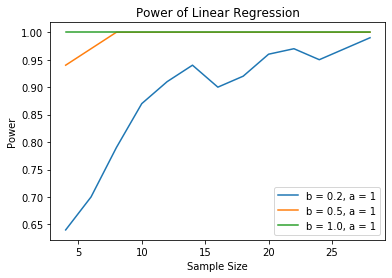

None


In [5]:
#Test the function
Nseq=np.arange(4,30,2)
B=[0.2,0.5,1.0]
A=[1,1,1]

print(LinRegPower(Nseq,B,A,1,100))